In [247]:
# This is the beginning of the Project "Pymaceuticals"
# Initial Import
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import csv
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [248]:
# Creating the file paths
csvpath1 = os.path.join("Resources", "clinicaltrial.csv")
dataframect = pd.read_csv(csvpath1)
dataframect.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [249]:
csvpath2 = os.path.join("Resources", "mousedrug.csv")
dataframemd = pd.read_csv(csvpath2)
dataframemd.head()

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


In [250]:
# Merging the dataframes to create a master dataframe
masterdf = pd.merge(dataframect, dataframemd, on="Mouse ID", how="left")
masterdf.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


In [251]:
# Tumor Response to Treatment
# Using the ".loc" function to create an averaged dataframe
dataframeavg = masterdf.loc[:,["Timepoint", "Drug", "Tumor Volume (mm3)"]]
dataframex = dataframeavg.groupby(["Drug", "Timepoint"]).mean()
dataframex.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [252]:
# Reformatting the graph
reformat = pd.pivot_table(dataframex, values='Tumor Volume (mm3)', index=['Timepoint'], columns=['Drug'])
reformat.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [253]:
# Finding the standard error of the data using ".sem"
standarderrors = dataframeavg.groupby(["Drug", "Timepoint"]).sem()
standarderrors.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731

In [254]:
# Reformat graph for Standard Errors
standarderrors.reset_index()
reformat_err = pd.pivot_table(standarderrors, values='Tumor Volume (mm3)', index=['Timepoint'], columns=['Drug'])
reformat_err.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


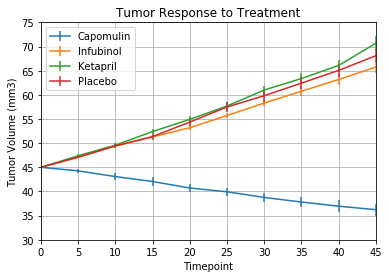

In [255]:
# Generating the plot
# https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.errorbar.html
# This portion was EXCEPTIONALLY MORE DIFFICULT due to several "KeyErrors" encountered

plt.errorbar(np.arange(0, 50, 5), dataframex.loc["Capomulin", "Tumor Volume (mm3)"],
             yerr = standarderrors.loc["Capomulin", "Tumor Volume (mm3)"], label = "Capomulin")
plt.errorbar(np.arange(0, 50, 5), dataframex.loc["Infubinol", "Tumor Volume (mm3)"],
             yerr = standarderrors.loc["Infubinol", "Tumor Volume (mm3)"], label = "Infubinol")
plt.errorbar(np.arange(0, 50, 5), dataframex.loc["Ketapril", "Tumor Volume (mm3)"],
             yerr = standarderrors.loc["Ketapril", "Tumor Volume (mm3)"], label = "Ketapril")
plt.errorbar(np.arange(0, 50, 5), dataframex.loc["Placebo", "Tumor Volume (mm3)"],
             yerr = standarderrors.loc["Placebo", "Tumor Volume (mm3)"], label = "Placebo")


plt.legend(loc="best")
plt.title('Tumor Response to Treatment')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.xlim(0,45)
plt.ylim(30,75)
plt.grid()
plt.savefig(os.path.join('..','Figures','tumor_response.png'))
# Note this Output for future use. Create a formula using the above as guidelines.
# This section required large amounts of research. Study this section diligently.
# Reminder: Ask the instructors, schedule tutoring, review with group

In [256]:
# Metastatic Response to Treatment
dataframeavg = masterdf.loc[:,["Timepoint", "Drug", "Metastatic Sites"]]
dataframex = dataframeavg.groupby(["Drug", "Timepoint"]).mean()
dataframex.head()
# Note: This portion is similar to the formulas used at the beginning of "Tumor Response to Treatment"
# Note: From here on forward, most formulas and code will be repeat structures from the above

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [257]:
# Reformatting the graph
reformat = pd.pivot_table(dataframex, values='Metastatic Sites', index=['Timepoint'], columns=['Drug'])
reformat.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [258]:
# Calculating Standard Error for Metastatic
standarderrors = dataframeavg.groupby(["Drug", "Timepoint"]).sem()
standarderrors.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [259]:
# Reformat graph for Standard Errors
standarderrors.reset_index()
reformat_err = pd.pivot_table(standarderrors, values='Metastatic Sites', index=['Timepoint'], columns=['Drug'])
reformat_err.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


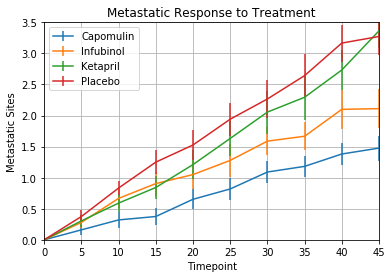

In [260]:
# Generating the Plot
# Reusing the same formula under "Tumor Respone to Treatment" to create the next graph

plt.errorbar(np.arange(0, 50, 5), dataframex.loc["Capomulin", "Metastatic Sites"],
             yerr = standarderrors.loc["Capomulin", "Metastatic Sites"], label = "Capomulin")
plt.errorbar(np.arange(0, 50, 5), dataframex.loc["Infubinol", "Metastatic Sites"],
             yerr = standarderrors.loc["Infubinol", "Metastatic Sites"], label = "Infubinol")
plt.errorbar(np.arange(0, 50, 5), dataframex.loc["Ketapril", "Metastatic Sites"],
             yerr = standarderrors.loc["Ketapril", "Metastatic Sites"], label = "Ketapril")
plt.errorbar(np.arange(0, 50, 5), dataframex.loc["Placebo", "Metastatic Sites"],
             yerr = standarderrors.loc["Placebo", "Metastatic Sites"], label = "Placebo")


plt.legend(loc="best")
plt.title('Metastatic Response to Treatment')
plt.xlabel('Timepoint')
plt.ylabel('Metastatic Sites')
plt.xlim(0,45)
plt.ylim(0,3.5)
plt.grid()
plt.savefig(os.path.join('..','Figures','metastatic_response.png'))

In [261]:
# Survival Rates
survival = masterdf.groupby(["Drug", "Timepoint"])
survivaldf = survival[["Mouse ID"]].nunique().rename(columns={"Mouse ID":"Mouse Count"})
survivaldf.head()

Mouse Count
Drug      Timepoint             
Capomulin 0                   25
          5                   25
          10                  25
          15                  24
          20                  23

In [262]:
# Reformatting the graph
reformat = pd.pivot_table(survivaldf, values='Mouse Count', index=['Timepoint'], columns=['Drug'])
reformat.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,25,25,25,25
5,25,21,25,23,23,24,24,25,24,24
10,25,20,21,22,21,24,22,24,22,22
15,24,19,21,19,21,20,16,24,22,21
20,23,18,20,19,20,19,16,23,20,17


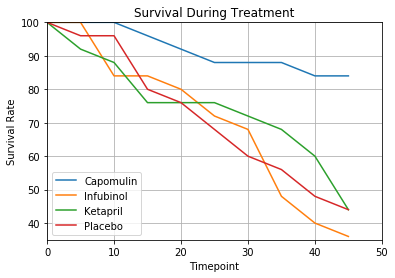

In [263]:
# Generating the Plot
# Reusing the same formula under "Tumor Respone to Treatment" to create the next graph
# Multiplied by 4 in order to get a percentage
plt.plot(np.arange(0, 50, 5), survivaldf.loc["Capomulin", "Mouse Count"]*4, label = "Capomulin")
plt.plot(np.arange(0, 50, 5), survivaldf.loc["Infubinol", "Mouse Count"]*4, label = "Infubinol")
plt.plot(np.arange(0, 50, 5), survivaldf.loc["Ketapril", "Mouse Count"]*4, label = "Ketapril")
plt.plot(np.arange(0, 50, 5), survivaldf.loc["Placebo", "Mouse Count"]*4,label = "Placebo")


plt.legend(loc="best")
plt.title('Survival During Treatment')
plt.xlabel('Timepoint')
plt.ylabel('Survival Rate')
plt.xlim(0,50)
plt.ylim(35,100)
plt.grid()
plt.savefig(os.path.join('..','Figures','survival.png'))

In [264]:
# Summary Bar Graph
# This section required extensive amounts of research. Most of which are new functions
# Study this section heavily until the concept is understood.

begin = masterdf.loc[(masterdf["Timepoint"] == 0), ["Drug", "Tumor Volume (mm3)"]]
initial = begin.groupby("Drug")["Tumor Volume (mm3)"].sum()

end = pd.DataFrame(columns = ['Drug', 'Tumor Volume (mm3)'])

for mouse in dataframemd["Mouse ID"]:
    max_time = masterdf.loc[masterdf["Mouse ID"] == mouse, "Timepoint"].max()
    finalvolume = masterdf.loc[(masterdf["Timepoint"] == max_time) & (masterdf["Mouse ID"] == mouse),
                                ["Drug", "Tumor Volume (mm3)"]]    
    end = pd.concat([end, finalvolume])


ending = end.groupby("Drug")["Tumor Volume (mm3)"].sum()

percentchange = 100*(ending - initial)/initial

print(percentchange)

Drug
Capomulin   -18.516516
Ceftamin     28.342171
Infubinol    30.442222
Ketapril     39.569314
Naftisol     36.012793
Placebo      34.463143
Propriva     26.580767
Ramicane    -19.574688
Stelasyn     35.827583
Zoniferol    31.513906
Name: Tumor Volume (mm3), dtype: float64


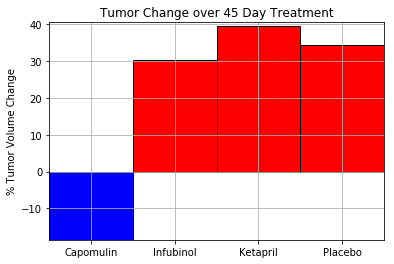

In [265]:

x_axis = np.arange(0,4,1)
heights = [percentchange["Capomulin"], percentchange["Infubinol"], percentchange["Ketapril"], percentchange["Placebo"]]
labels = ["Capomulin", "Infubinol", "Ketapril", "Placebo"]
colors = []

for vols in heights:
    if vols >= 0:
        colors.append('r')
    else:
        colors.append('b')

finalplot = plt.bar(x_axis, heights, width = 1, align='center', color = colors,
                 edgecolor = 'black', linewidth = 1, tick_label = labels)

plt.title("Tumor Change over 45 Day Treatment")
plt.ylabel("% Tumor Volume Change")
plt.grid()
plt.xlim(-0.5,3.5)
plt.ylim(min(heights), max(heights)+1)
plt.savefig(os.path.join('..','Figures','tumor_change_over_45_days.png'))
plt.show()